<a href="https://colab.research.google.com/github/krishnamani77/TF2_Notebooks/blob/master/keras_mlp_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [66]:
tf.__version__

'2.2.0-rc1'

In [67]:
keras.__version__

'2.2.4-tf'

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist.load_data()

In [70]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [71]:
X_train_full.dtype, y_train_full.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [0]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [0]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [74]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28), (55000,), (5000,), (10000,))

In [0]:
class_names=['T-shirt/top','Trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

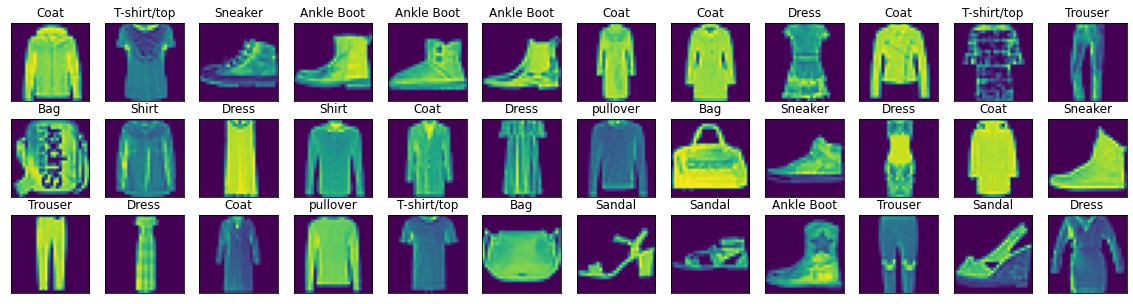

In [77]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.title.set_text(class_names[y_train[i]])
    ax.imshow(np.squeeze(X_train[i]))

- The first line creates a Sequential model in Keras. This is the simplest kind of Keras model for NNs that are composed of a single stack of layers connected sequentially. 
- Next, the first layer is built and added to the model. It is a Flatten layer whose role is to convert each input image into a 1D array.
- Next, two Dense hidden layers are added. They have 300 and 100 neurons respectively.
- Finally a Dense output layer is added, with a softmax activation implying that it outputs a probabilistic score corresponding to each of the output label types.

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(len(class_names), activation="softmax"))

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.layers

In [0]:
hidden1 = model.layers[1]
hidden2 = model.layers[2]

In [84]:
hidden1.name

'dense_6'

In [85]:
hidden2.name

'dense_7'

In [0]:
w1,b1 = hidden1.get_weights()

In [88]:
w1, b1

(array([[-0.00467008,  0.01510894, -0.01738139, ...,  0.06128061,
         -0.06684938, -0.00018949],
        [-0.03362545,  0.01799133,  0.07297324, ...,  0.05978018,
         -0.04709768,  0.07159455],
        [-0.04492982,  0.01090699,  0.05618784, ..., -0.05723028,
          0.005367  , -0.02373848],
        ...,
        [-0.02591594,  0.00295117,  0.07378338, ...,  0.01452707,
         -0.0731831 , -0.05390145],
        [ 0.00631973,  0.03820971, -0.04588288, ...,  0.02493662,
          0.01087687, -0.05414531],
        [-0.03555737,  0.03887013, -0.02091477, ...,  0.02246962,
          0.05777523,  0.05427593]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

kernel_initializer or bias_initializer can be set when creating the layer for assigning user defined weights.  https://keras.io/initializers/

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=[keras.metrics.sparse_categorical_accuracy])

In [94]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7063 - sparse_categorical_accuracy: 0.7696 - val_loss: 0.4942 - val_sparse_categorical_accuracy: 0.8360
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4887 - sparse_categorical_accuracy: 0.8292 - val_loss: 0.4422 - val_sparse_categorical_accuracy: 0.8476
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4436 - sparse_categorical_accuracy: 0.8437 - val_loss: 0.4505 - val_sparse_categorical_accuracy: 0.8446
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4166 - sparse_categorical_accuracy: 0.8534 - val_loss: 0.4021 - val_sparse_categorical_accuracy: 0.8642
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3970 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.3972 - val_sparse_categorical_accuracy: 0.8592
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3801 -

In [0]:
import pandas as pd

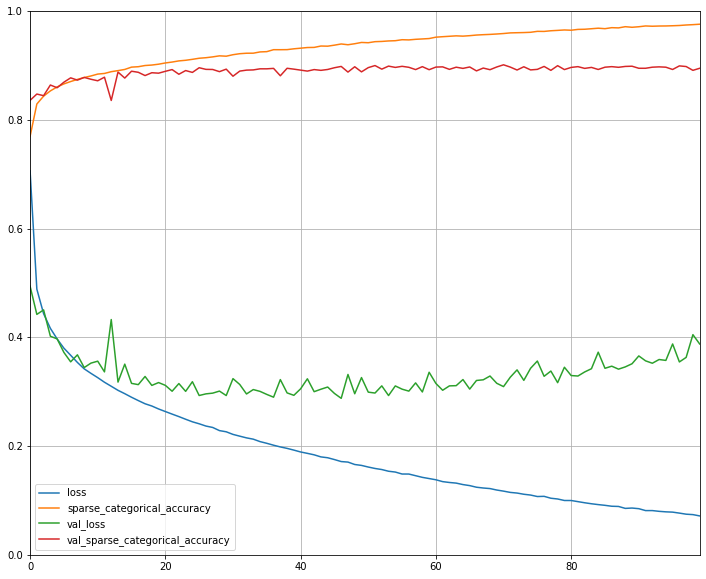

In [101]:
pd.DataFrame(history.history).plot(figsize=(12,10))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical rante to (0,1)
plt.show()

In [102]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 95.3579 - sparse_categorical_accuracy: 0.8622


[95.35787963867188, 0.8622000217437744]

In [114]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [115]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 0])

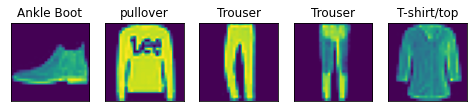

In [116]:
fig = plt.figure(figsize=(20,5))
for i in range(len(X_new)):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.title.set_text(class_names[y_pred[i]])
    ax.imshow(np.squeeze(X_new[i]))